In [1]:
import pandas as pd, numpy as np, os
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
if 'nb_dir' not in globals():
    nb_dir=os.getcwd()
    
%load_ext watermark
%autocall

Automatic calling is: Smart


# Significant Paired Tests for Snowfall in the Midwest
*Spatial autocorrelation not considered, thought the results are otherwise compelling. Run all cells with measure="SNWD" for snowdepth or with measure="SNOW" for snowfall (in millimeters).*

In [2]:
os.chdir(nb_dir)
measure = "SNWD"
# measure = "SNOW"
data_dir = f"Data/{measure}-All-States.xlsx"
df_raw = pd.read_excel(data_dir)

#define queries for northern/southern plains
print(f"States considered herein are {set(df_raw.state.values)}.")
qN = 'state is IA or state is ND or state is SD or state is MN or state is NE'
qS = 'state == TX | state == OK | state == KS'
booN =  (df_raw.state=='IA') | \
        (df_raw.state=='ND') | \
        (df_raw.state=='SD') | \
        (df_raw.state=='MN') | \
        (df_raw.state=='NE')
booS =  (df_raw.state=='TX') | \
        (df_raw.state=='KS') | \
        (df_raw.state=='OK') 

os.chdir('hw3_imgs/fig')

States considered herein are {'NE', 'IA', 'SD', 'MN', 'TX', 'OK', 'ND', 'KS'}.


__Example Results Section__: (this may be madlib'd for each section/region in a straightforward way)<br>
In the Northern Plains, the average weather station measurement of SNOW took a median value of 12 mm (IQR: 9.4-18 mm) from 1990-1995, which was less than that same value measured from 1980-1985, which took a median value of 16 mm (IQR: 11-30 mm), consistent with a significant distributional difference ($p<0.0001$, $U\approx6.8\cdot10^4$, $N_\text{stations}=694$) we found according to a Wilcoxon signed-rank test, which is a nonparametric paired test that does not assumed normality of the data.  This result is consistent with a paired student's t-test ($p<0.0001$, $t\approx9.5$, $N_\text{stations}=694$), which does make normality assumptions for the underlaying distribution of SNOW measurements.  This comparative test was repeated with various other choices for time intervals, and the results were consistent.  These tests were repeated for snow depth measurements (SNWD), which yielded consistently significant ($p<0.0001$) results, which are discussed in the following paragraph.

In the Northern Plains, the average weather station measurement of SNWD took a median value of 55 mm (IQR: 38-76 mm) from 1990-1995, which was less than that same value measured from 1980-1985, which took a median value of 16 mm (IQR: 11-30 mm), consistent with a significant distributional difference ($p<0.0001$, $U\approx7.0\cdot10^4$, $N_\text{stations}=693$) we found according to a Mann-Whitney U test, which is a nonparametric paired test that does not assumed normality of the data.  This result is consistent with a paired student's t-test ($p<0.0001$, $t\approx9.7$, $N_\text{stations}=693$), which does make normality assumptions for the underlaying distribution of SNOW measurements.  This comparative test was repeated with various other choices for time intervals, and the results were consistent.  

__Caveat__:<br>
Both statistical tests assume statistically independent observation pairs.  We would expect observations to be autocorrelated spatially.  Therefore, a statistical test that considers spatial autocorrelation is necessary to prove *beyond a reasonable doubt* that snowfall has decreased between the periods 1980-1985 and 1990-1995.

__Nota Bene__:<br>
The following [assumptions](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test) are made for the Wilcoxon signed-rank test — not all of which are met here:
 - Data are paired and come from the same population.
 - Each pair is chosen randomly and independently[citation needed].
 - The data are measured on at least an interval scale when, as is usual, within-pair differences are calculated to perform the test (though it does suffice that within-pair comparisons are on an ordinal scale).

# SNOW/SNWD in the Northern Plains

## compute results

In [3]:
q1 = '1980 <= Year < 1985  and Values>0'
q2 = '1990 <= Year < 1995  and Values>0'
df = df_raw[booN].copy()
set1 = df.query(q1).groupby('Station')[['Station','Values', 'state']].mean()
set2 = df.query(q2).groupby('Station')[['Station','Values', 'state']].mean()

In [4]:
df2 = set2.rename(columns={'Values':"Values_2"})
df2['Values_1'] = set1['Values']
df2.dropna(inplace=True)
df2['change'] = df2['Values_2'] - df2['Values_1']
df2['log_meas_1'] = np.log(df2['Values_1'])
df2['log_meas_2'] = np.log(df2['Values_2'])

In [5]:
a = df2.Values_1
b = df2.Values_2

In [6]:
assert(len(a)==len(b))
print(f'Number of stations considered = {len(a)}')

Number of stations considered = 692


In [7]:
dy = df2['change'].values
stats.wilcoxon(dy)

WilcoxonResult(statistic=70709.5, pvalue=8.884065156051147e-21)

In [8]:
stats.wilcoxon(a,b)

WilcoxonResult(statistic=70709.5, pvalue=8.884065156051147e-21)

In [9]:
stats.ttest_rel(a,b)

Ttest_relResult(statistic=9.834027384757572, pvalue=1.8992330657074886e-21)

In [10]:
#Values_2 is the mean station measurement from 1990-1992
#Values_1 is the mean station measurement form 1983-1985
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Values_2,692.0,57.425316,23.962999,13.066667,37.578333,53.748889,73.765000,126.000000
Values_1,692.0,65.967213,27.583579,14.788889,43.792222,63.507778,85.200000,126.000000
change,692.0,-8.541897,22.849461,-103.882222,-19.120000,-6.096667,4.082222,54.133333
log_meas_1,692.0,4.094089,0.451605,2.693876,3.779456,4.151157,4.445000,4.836282
log_meas_2,692.0,3.961061,0.431268,2.570064,3.626426,3.984323,4.300884,4.836282


## plots and figures

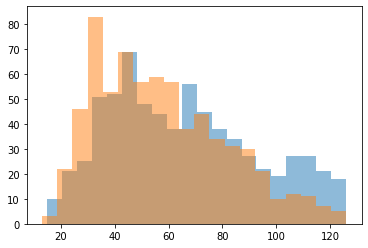

In [11]:
plt.hist(a, bins=20, alpha=0.5)
plt.hist(b, bins=20, alpha=0.5);

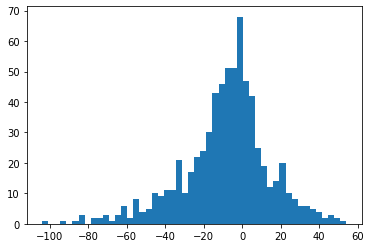

In [12]:
plt.hist(dy, bins=50);

In [13]:
# g = sns.jointplot(x="log_meas_1", y="log_meas_2", data=df2, s=3)
# g = sns.jointplot(x="log_meas_1", y="log_meas_2", data=df2, kind='hex', color='k')

<Figure size 252x216 with 0 Axes>

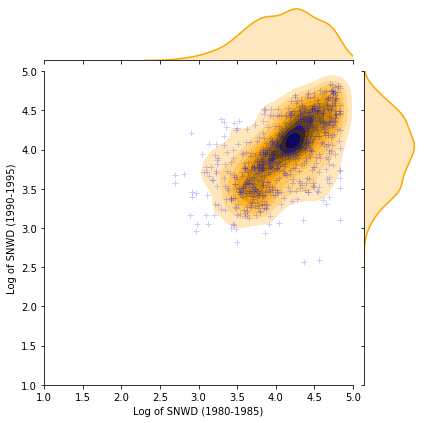

In [14]:
plt.figure(figsize=(3.5,3))
g = sns.jointplot(x="log_meas_1", y="log_meas_2", data=df2, kind="kde", color="orange")
g.plot_joint(plt.scatter, c="blue", s=30, linewidth=1, marker="+", alpha=0.2)
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels(f"Log of {measure} (1980-1985)", f"Log of {measure} (1990-1995)")
plt.ylim(1, 5)
plt.xlim(1, 5)
plt.savefig(f'fig_{measure}_NP_paired.png', dpi=400)

In [15]:
# # Plot formatting
# sns.distplot(df2['Values_1'],  kde=False, label='1980-1985', bins=30)
# sns.distplot(df2['Values_2'],  kde=False, label='1990-1995', bins=30)
# plt.legend(prop={'size': 12})
# plt.title('Average Station SNOW Measurement\nin the Northern Plains')
# plt.xlabel('mm')
# plt.xscale('log')
# plt.ylabel('frequency')

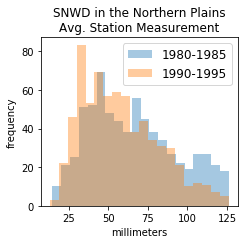

In [16]:
plt.figure(figsize=(3.5,3.5))
if measure=='SNWD':
    plt.hist(df2['Values_1'].values, label='1980-1985', alpha=0.4, bins=20)#np.logspace(np.log10(10),np.log10(200), 20))
    plt.hist(df2['Values_2'].values, label='1990-1995', alpha=0.4, bins=20)#np.logspace(np.log10(10),np.log10(200), 20))
else:
    plt.hist(df2['Values_1'].values, label='1980-1985', alpha=0.4, bins=np.logspace(np.log10(3),np.log10(100), 20))
    plt.hist(df2['Values_2'].values, label='1990-1995', alpha=0.4, bins=np.logspace(np.log10(3),np.log10(100), 20))
    plt.xscale('log')
plt.legend(prop={'size': 12})
plt.title(f'{measure} in the Northern Plains\nAvg. Station Measurement')
plt.xlabel('millimeters')
plt.ylabel('frequency')
# plt.show()
plt.tight_layout()
plt.savefig(f'fig_{measure}_NP.png', transparent=True, dpi=400)

# SNOW/SNWD in the Southern Plains

## compute results

In [17]:
q1 = '1980 <= Year < 1985  and Values>0'
q2 = '1990 <= Year < 1995  and Values>0'
df = df_raw[booS].copy()
set1 = df.query(q1).groupby('Station')[['Station','Values', 'state']].mean()
set2 = df.query(q2).groupby('Station')[['Station','Values', 'state']].mean()

In [18]:
df2 = set2.rename(columns={'Values':"Values_2"})
df2['Values_1'] = set1['Values']
df2.dropna(inplace=True)
df2['change'] = df2['Values_2'] - df2['Values_1']
df2['log_meas_1'] = np.log(df2['Values_1'])
df2['log_meas_2'] = np.log(df2['Values_2'])

In [19]:
a = df2.Values_1
b = df2.Values_2

In [20]:
assert(len(a)==len(b))
print(f'Number of stations considered = {len(a)}')

Number of stations considered = 566


In [21]:
dy = df2['change'].values
stats.wilcoxon(dy)

WilcoxonResult(statistic=12175.0, pvalue=1.879218729760742e-68)

In [22]:
stats.wilcoxon(a,b)

WilcoxonResult(statistic=12175.0, pvalue=1.879218729760742e-68)

In [23]:
stats.ttest_rel(a,b)

Ttest_relResult(statistic=22.62598742847972, pvalue=3.5195715043815714e-81)

In [24]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Values_2,566.0,21.043475,21.770384,0.866667,3.679630,15.303333,31.185000,126.000000
Values_1,566.0,49.050436,25.629603,1.366667,29.133333,43.491111,65.996667,126.000000
change,566.0,-28.006961,29.448736,-123.200000,-46.363889,-28.336389,-9.118333,96.600000
log_meas_1,566.0,3.713675,0.694125,0.312375,3.371869,3.772554,4.189597,4.836282
log_meas_2,566.0,2.435314,1.234682,-0.143101,1.302794,2.728051,3.439912,4.836282


## plots and figures

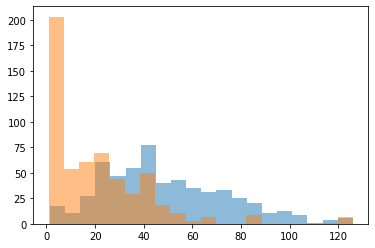

In [25]:
plt.hist(a, bins=20, alpha=0.5)
plt.hist(b, bins=20, alpha=0.5);

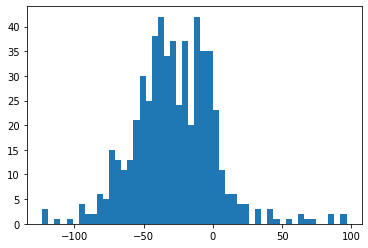

In [26]:
plt.hist(dy, bins=50);

<Figure size 252x216 with 0 Axes>

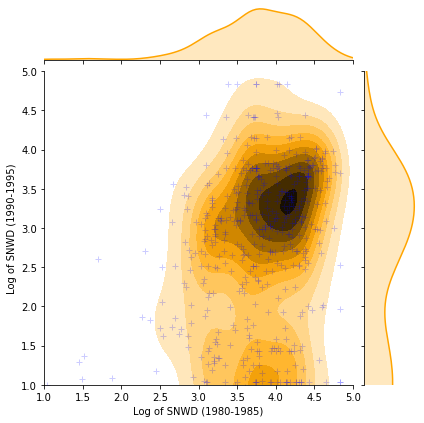

In [27]:
plt.figure(figsize=(3.5,3))
g = sns.jointplot(x="log_meas_1", y="log_meas_2", data=df2.fillna(1), kind="kde", color="orange")
g.plot_joint(plt.scatter, c="blue", s=30, linewidth=1, marker="+", alpha=0.2)
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels(f"Log of {measure} (1980-1985)", f"Log of {measure} (1990-1995)")
plt.ylim(1, 5)
plt.xlim(1, 5)
plt.savefig(f'fig_{measure}_SP_paired.png', dpi=400)

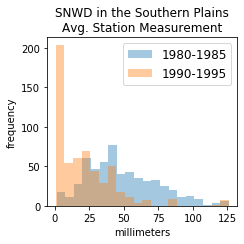

In [28]:
plt.figure(figsize=(3.5,3.5))
if measure=='SNWD':
    plt.hist(df2['Values_1'].values, label='1980-1985', alpha=0.4, bins=20)#np.logspace(np.log10(10),np.log10(200), 20))
    plt.hist(df2['Values_2'].values, label='1990-1995', alpha=0.4, bins=20)#np.logspace(np.log10(10),np.log10(200), 20))
else:
    plt.hist(df2['Values_1'].values, label='1980-1985', alpha=0.4, bins=np.logspace(np.log10(3),np.log10(100), 20))
    plt.hist(df2['Values_2'].values, label='1990-1995', alpha=0.4, bins=np.logspace(np.log10(3),np.log10(100), 20))
    plt.xscale('log')
plt.legend(prop={'size': 12})
plt.title(f'{measure} in the Southern Plains\nAvg. Station Measurement')
plt.xlabel('millimeters')
plt.ylabel('frequency')
# plt.show()
plt.tight_layout()
plt.savefig(f'fig_{measure}_SP.png', transparent=True)

# Now for both

## compute results

In [29]:
q1 = '1980 <= Year < 1985 and Values>0'
q2 = '1990 <= Year < 1995 and Values>0'
df = df_raw.copy()
set1 = df.query(q1).groupby('Station')[['Station','Values', 'state']].mean()
set2 = df.query(q2).groupby('Station')[['Station','Values', 'state']].mean()

In [30]:
df2 = set2.rename(columns={'Values':"Values_2"})
df2['Values_1'] = set1['Values']
df2.dropna(inplace=True)
df2['change'] = df2['Values_2'] - df2['Values_1']
df2['log_meas_1'] = np.log(df2['Values_1'])
df2['log_meas_2'] = np.log(df2['Values_2'])

In [31]:
a = df2.Values_1
b = df2.Values_2

In [32]:
assert(len(a)==len(b))
print(f'Number of stations considered = {len(a)}')

Number of stations considered = 1258


In [33]:
dy = df2['change'].values
stats.wilcoxon(dy)

WilcoxonResult(statistic=137036.0, pvalue=9.062789144154677e-90)

In [34]:
stats.wilcoxon(a,b)

WilcoxonResult(statistic=137036.0, pvalue=9.062789144154677e-90)

In [35]:
stats.ttest_rel(a,b)

Ttest_relResult(statistic=22.102729996403855, pvalue=1.020043244197327e-91)

In [36]:
#Values_2 is the mean station measurement from 1990-1992
#Values_1 is the mean station measurement form 1983-1985
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Values_2,1258.0,41.056380,29.266822,0.866667,18.692778,37.602222,59.252222,126.000000
Values_1,1258.0,58.356008,28.007061,1.366667,37.447222,54.141667,76.490000,126.000000
change,1258.0,-17.299628,27.760749,-123.200000,-34.947222,-12.691111,-0.659444,96.600000
log_meas_1,1258.0,3.922933,0.603758,0.312375,3.622932,3.991602,4.337160,4.836282
log_meas_2,1258.0,3.274596,1.167925,-0.143101,2.928137,3.627063,4.081802,4.836282


## plots and figures

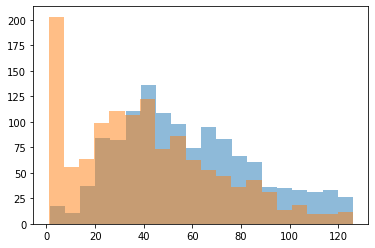

In [37]:
plt.hist(a, bins=20, alpha=0.5)
plt.hist(b, bins=20, alpha=0.5);

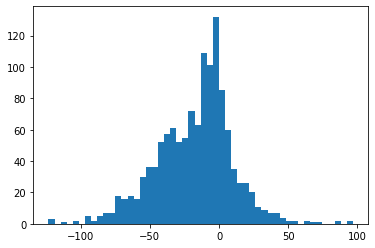

In [38]:
plt.hist(dy, bins=50);

<Figure size 252x216 with 0 Axes>

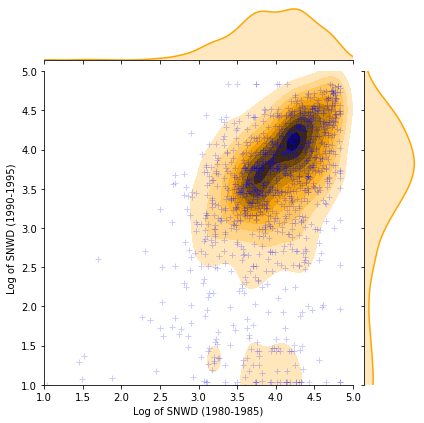

In [39]:
plt.figure(figsize=(3.5,3))
g = sns.jointplot(x="log_meas_1", y="log_meas_2", data=df2, kind="kde", color="orange")
g.plot_joint(plt.scatter, c="blue", s=30, linewidth=1, marker="+", alpha=0.2)
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels(f"Log of {measure} (1980-1985)", f"Log of {measure} (1990-1995)")
plt.ylim(1, 5)
plt.xlim(1, 5)
plt.savefig(f'fig_{measure}_all_paired.png', dpi=400)

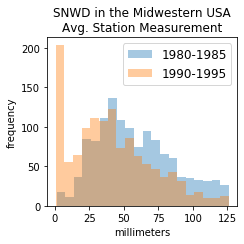

In [40]:
plt.figure(figsize=(3.5,3.5))
if measure=='SNWD':
    plt.hist(df2['Values_1'].values, label='1980-1985', alpha=0.4, bins=20)#np.logspace(np.log10(10),np.log10(200), 20))
    plt.hist(df2['Values_2'].values, label='1990-1995', alpha=0.4, bins=20)#np.logspace(np.log10(10),np.log10(200), 20))
else:
    plt.hist(df2['Values_1'].values, label='1980-1985', alpha=0.4, bins=np.logspace(np.log10(3),np.log10(100), 20))
    plt.hist(df2['Values_2'].values, label='1990-1995', alpha=0.4, bins=np.logspace(np.log10(3),np.log10(100), 20))
    plt.xscale('log')
plt.legend(prop={'size': 12})
plt.title(f'{measure} in the Midwestern USA\nAvg. Station Measurement')
plt.xlabel('millimeters')
plt.ylabel('frequency')
# plt.show()
plt.tight_layout()
plt.savefig(f'fig_{measure}_all.png', transparent=True, dpi=400)

In [41]:
%watermark -iv -h -r

numpy   1.16.4
seaborn 0.9.0
pandas  0.24.2
host name: MacBook-Pro-189.local
Git repo: https://github.com/timtyree/dsc291team4.git
